# 8-queens-puzzle

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Global Constants

In [2]:
# CONSTANTS
N_QUEENS = 8
MUTATION_RATE=0.3
CROSSOVER_RATE=0.8
GENERATIONS = 4000
CROSSOVER_POINT = 4
POPULATION_SIZE = 20
ELITISM_SIZE = 5

### Fitness Function

In [3]:
def check_attack(queen_row1, queen_row2, solution):
    '''
    solution: vector of 8 positions, each representing the position of a queen in a column. 
    Attack when:
        - Same Line
        - Same Column
        - Diagonals
    '''
    queen_col1 = solution[queen_row1]
    queen_col2 = solution[queen_row2]
    return ((queen_row1 == queen_row2) or 
            (queen_col1 == queen_col2) or 
            (queen_row1 - queen_col1 == queen_row2 - queen_col2) or 
            (queen_row1 + queen_col1 == queen_row2 + queen_col2)
           )

def fitness(solution):
    '''
    Fitness function defined by the number of queens not attacking each other
    '''
    non_attack_counter = 0
    for row1 in range(len(solution)):
        for row2 in range(row1+1, len(solution)):
            non_attack_counter += not check_attack(row1, row2, solution)
    
    return non_attack_counter

def sortByFitness(population):
    scores = [fitness(solution) for solution in population]
    return [x for _, x in sorted(zip(scores, population), key=lambda p: p[0], reverse=True)]

### Generate Random Initial Population

In [4]:
def init_population(chromosome_size, population_size):
    population = []
    for i in range(population_size):
        population.append(np.random.randint(N_QUEENS, size=N_QUEENS))
        
    return population

### Crossover

In [5]:
def crossover(solution1, solution2):
    '''
    Random One-Point crossover or Specific Crossover Point
    '''
    child1 = solution1.copy()
    child2 = solution2.copy()
    if np.random.uniform(0,1) < CROSSOVER_RATE:       
        
        interval = len(solution1)
        crossover_point = np.random.randint(interval) if CROSSOVER_POINT == None else CROSSOVER_POINT

        child1[crossover_point:] = child1[crossover_point:] + child2[crossover_point:]
        child2[crossover_point:] = child1[crossover_point:] - child2[crossover_point:]
        child1[crossover_point:] = child1[crossover_point:] - child2[crossover_point:]
        
    return child1, child2

### Mutation

In [6]:
def mutation(solution, **kwargs):
    '''
    Swap Mutation or "Change"
    '''
    if np.random.uniform(0,1) < MUTATION_RATE:
        if kwargs:
            method = kwargs.get('method')
            if method == 'swap':
                indexes = random.sample(range(len(solution)), 2)
                solution [indexes[0]], solution [indexes[1]] = solution [indexes[1]], solution [indexes[0]]

            if method == 'random':
                alleles_max = len(solution)
                selected_gene = np.random.randint(len(solution))
                solution[selected_gene] = np.random.randint(alleles_max)

        solution = check_conditions(solution)
    
    


def check_conditions(solution):
    duplicateFlag = False
    his = set([]) 
    for idx, ele in enumerate(solution): 
        if ele in his: 
            duplicateFlag = True
        his.add(ele)    
    
    if duplicateFlag:
        solution = create_uniques(solution)
        
    return solution

def create_uniques(arr):
    # Get unique ones and the respective counts
    unq,c = np.unique(arr,return_counts=1)

    # Get mask of matches from the arr against the ones that have 
    # respective counts > 1, i.e. the ones with duplicates
    m = np.isin(arr,unq[c>1])

    # Get the ones that are absent in original array and shuffle it
    newvals = np.setdiff1d(np.arange(len(arr)),arr[~m])
    np.random.shuffle(newvals)

    # Assign the shuffled values into the duplicate places to get final o/p
    arr[m] = newvals
    return arr


### Selection

In [7]:
def selection(population, **kwargs):
    '''
    Tournament Selection or Elitism
    '''
    bests = []
    if kwargs:
        method = kwargs.get('method')
        
        if method == 'elitism':
            orderedPop = sortByFitness(population)
            bests = orderedPop[:ELITISM_SIZE]
           
        
        if method == 'tournament':
            top = int(crossover_rate*len(population[0]))
            if top%2 == 0:
                bc = max(2, top)
            else:
                bc = max(2,top+1)


            best = None
            for i in range(k):
                individual = population[random.randrange(0, k)]        
                if(best == None or fitness(individual) > fitness(best)):
                    best = individual
            bests.append(best)
            
    return bests


### Next Generation

In [8]:
def newGeneration(population):
               
    # Evaluate and Select individuals and Reproduce
    # Selection
    orderedPopulation = sortByFitness(population)
       
    # Elitism
    new_generation = orderedPopulation[:ELITISM_SIZE]
        
    while len(new_generation) < POPULATION_SIZE:
        
        # Crossover
        ind1, ind2 = random.choices(population, k=2)
        child_1, child_2 = crossover(ind1, ind2)
        
        # Mutation
        # TODO: MELHORAR ESTATÍSTICA DO MÉTODO DE MUTAÇÃO
        mutation(child_1, method='random')
        mutation(child_2, method='random')        

        # Add to next generation
        new_generation.append(child_1)
        new_generation.append(child_2)
        
    return new_generation
  
    

# Genetic Algorithm Implementation

In [9]:

def GA(population):
    
    ITERATIONS = 0
    CONVERGENCE_COUNTER = 0
    while (ITERATIONS <= GENERATIONS):        
        
        # NEW GENERATION
        population = newGeneration(population)
        
        partialBest = sortByFitness(population)[0]
        print("\n ITERATION: "+str(ITERATIONS)+ 
              "\n Fitness: "+str(fitness(partialBest))+
              "\n Partial Best: "+str(partialBest)
             )
        
        ITERATIONS+=1 
    
#   LAST Generation
    best = sortByFitness(population)[0]
    return best
        
        
        
        

### PLOTS (by Leonnardo)

In [10]:
def plot_result(size, final_chromosome):
    chess_board = np.zeros(size**2)
    
    #paint every square if it's an odd side chess 
    if size%2 != 0:
        chess_board[::2] = 1
        
    #reshape it into a square
    chess_board = chess_board.reshape((size,size))
    
    #paint the cells if it's even side chess
    for i in range(size):        
        if i%2 == 0:
            rang = range(0,size,2)
        else:
            rang = range(1,size,2)
        for j in rang:
            chess_board[i,j] = 1
    #paint the queens
    for i,j in enumerate(final_chromosome):
        chess_board[i,j] = 2
    
    labels = range(size)    
    plt.matshow(chess_board)
    plt.xticks(range(size), labels)
    plt.yticks(range(size), labels)
    plt.title(f'best chromosome found to the {size}-queen problem')
    plt.show()

### TESTS


 ITERATION: 0
 Fitness: 25
 Partial Best: [1 6 0 3 0 7 5 7]

 ITERATION: 1
 Fitness: 26
 Partial Best: [7 4 1 3 6 2 0 5]

 ITERATION: 2
 Fitness: 26
 Partial Best: [7 4 1 3 6 2 0 5]

 ITERATION: 3
 Fitness: 26
 Partial Best: [7 4 1 3 6 2 0 5]

 ITERATION: 4
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 5
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 6
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 7
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 8
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 9
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 10
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 11
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 12
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 13
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 14
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 15
 Fitness: 27
 Partial Best: [5 0 3 6 2 7 1 4]

 ITERATION: 16
 F

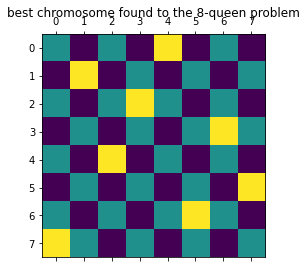

In [11]:
# Create a random initial population of possible solutions
population = init_population(chromosome_size=N_QUEENS, population_size=POPULATION_SIZE)
best_solution = GA(population)
print(best_solution)

plot_result(N_QUEENS, best_solution)
